<a href="https://colab.research.google.com/github/viniciussz7/projeto_RegressaoLinear/blob/main/projeto_regressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementação e Análise do Algoritmo Regressão Linear

**Objetivo:** Implementar e avaliar o desempenho do algoritmo de Regressão Linear desenvolvendo um modelo preditivo para resolver um problema de inferência sobre taxa de engajamento dos principais influenciadores do instagram.

**Autores:**

* Vinícius de Oliveira Souza

* Sanley Pires

## 📚 Importação das Bibliotecas

Primeiro, importamos todas as bibliotecas necessárias para nossa análise e visualização dos dados.

- **pandas 🐼**
- **matplotlib 🎨**
- **seaborn 📈**
- **scikit-learn 🛠️**
- **numpy 🔢**

In [ ]:
# Instalação de pacotes necessários diretamente no ambiente do Colab
!pip install matplotlib scikit-learn pandas seaborn

# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📁 Carregando Dataset

A base de dados utilizada no projeto é um dataset do Instagram que faz análise dos dados dos maiores influenciadores da plataforma.


Disponível no kaggle em:
[Top Instagram Influencers Data](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned)

In [ ]:
url = 'https://drive.usercontent.google.com/u/0/uc?id=1Dnf11YkRn5l9vQ8_AjA4ddFHnnaS--i_&export=download'
dataset = pd.read_csv(url)
dataset

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


### > Explicando as variáveis

- **rank**: Rank do influenciador com base na quantidade de seguidores.
- **channel_info**: Nome de usuário do influenciador no Instagram.
- **influence_score**: Pontuação de influência dos usuários, calculada com base em menções, importância e popularidade.
- **posts**: Número de postagens feitas até o momento.
- **followers**: Quantidade de seguidores do usuário.
- **avg_likes**: Média de curtidas nas postagens do influenciador (curtidas totais/postagens totais).
- **60_day_eng_rate**: Taxa de engajamento dos últimos 60 dias do influenciador, como fração do total de engajamentos feitos até agora.
- **new_post_avg_like**: Média de curtidas em novas postagens.
- **total_likes**: Total de curtidas que o usuário recebeu em suas postagens (em bilhões).
- **country**: País ou região de origem do usuário.


-


Nesse caso, a variável dependente é `influence_score`, ou seja, a variável que será predita a partir das demais variáveis independentes. Para entender a relação entre as variáveis, podemos calcular a matriz de correlação e a distruibuição da variável `influence_score` em relação as outras variáveis numéricas.



## 🛠️ Pré-processamento dos Dados: Conversão de Sufixos para Valores Reais
O dataset utilizado contém colunas que representam grandezas numéricas com sufixos indicando a ordem de magnitude ('k' para milhares, 'm' para milhões e 'b' para bilhões). Para realizar análises e cálculos precisos, é necessário converter esses valores em números reais.


-


A conversão para valores reais é crucial para garantir a consistência e a precisão das análises realizadas com o dataset. Ao eliminar os sufixos, os dados numéricos são padronizados, facilitando a comparação e a interpretação dos resultados.

In [ ]:
# Função para converter valores com sufixo 'k', 'm' ou 'b' para valores reais
def convert_to_real_value(value):

  if isinstance(value, str):
    if value.endswith('k'):
      return float(value[:-1]) * 1000
    elif value.endswith('m'):
      return float(value[:-1]) * 1000000
    elif value.endswith('b'):
      return float(value[:-1]) * 1000000000
  return value  # Retorna o valor original se não houver sufixo

                     rank  influence_score
rank             1.000000        -0.362993
influence_score -0.362993         1.000000


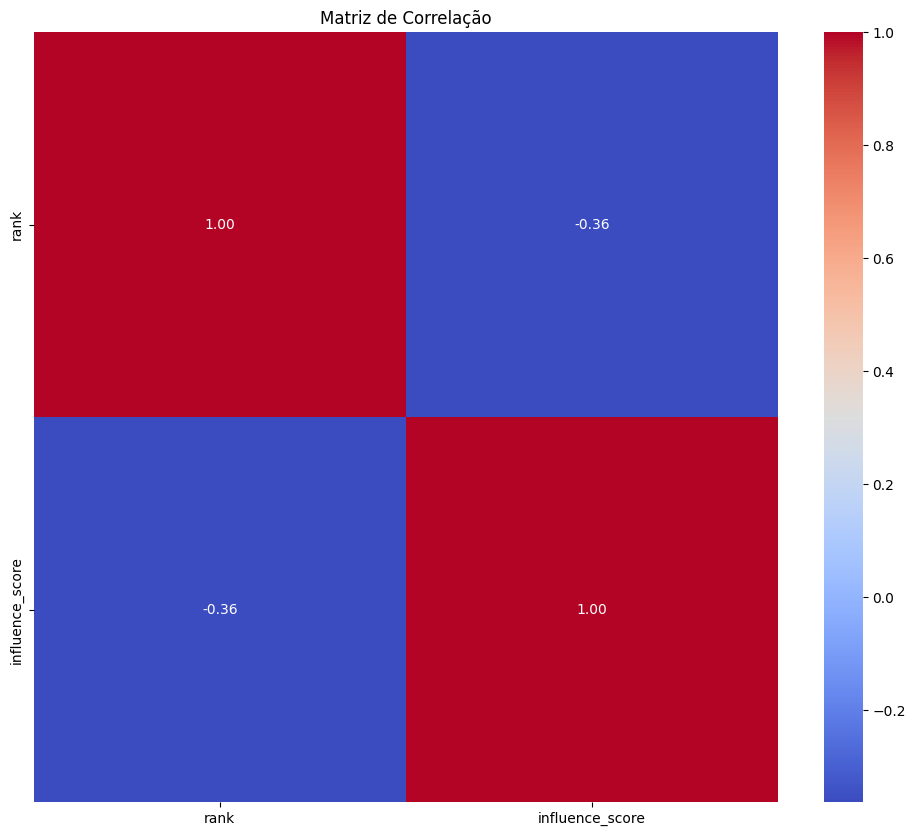

In [ ]:
# Seleciona colunas numéricas
numerical_cols = dataset.select_dtypes(include=np.number).columns
numerical_dataset = dataset.loc[:, numerical_cols]

# Calcula a matriz de correlação
correlation_matrix = numerical_dataset.corr()

# Mostra a matriz de correlação
print(correlation_matrix)

# Plota a matriz de correlação como um mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()